# HW 11

In [1]:
import pandas as pd
import numpy as np
from scipy import linalg
import matplotlib as mpl
import matplotlib.pyplot as plt
import cvxpy as cp
import cvxopt

### Problem 1.1
As per the definition in slide 8 of 13.2, a nonempty and bounded polyhedron is the convex hull of its extreme points and does not extend to infinity in any direction.

Each $x_{ij}$ is positive so we know that P will not extend into negative infinity. P will not extend into positive infinity either because all the constraints that make up P are linearly independent and intersect with each other, giving an upper bound to P that does not extend to infinity.

### Problem 1.2
$c = \begin{bmatrix} 0\\
                     1\\
                     0\\
                     0\\
                     1\\
                     1\\
     \end{bmatrix}\;\;$ 
$D = \begin{bmatrix} 1\\
                     0\\
                     0\\
                     0\\
                     0\\
                     1\\
     \end{bmatrix} \;\;$
$b=12$

### Problem 1.3
$x^1 = \begin{bmatrix} 10\\
                     10\\
                     0\\
                     0\\
                     10\\
                     10\\
     \end{bmatrix}\;\;$ 
$x^2 = \begin{bmatrix} 0\\
                     10\\
                     10\\
                     10\\
                     10\\
                     0\\
     \end{bmatrix}\;\;$ 
     
**Restricted Master Problem**  
$max_{\lambda_1, \lambda_2} \;\; \lambda_1c^Tx^1 + \lambda_2c^Tx^2 \\
s.t \;\;\;\;\;\;\;\;\; \lambda_1Dx^1+\lambda_2Dx^2 \le 12 \\
\;\;\;\;\;\;\;\;\;\;\;\;\; \lambda_1+\lambda_2 = 1\\
\;\;\;\;\;\;\;\;\;\;\;\;\; \lambda_1,\lambda_2 \ge 0 $

$max_{\lambda_1, \lambda_2} \;\; 30\lambda_1 + 20\lambda_2\\
s.t \;\;\;\;\;\;\;\;\; 20\lambda_1+0\lambda_2 \le 12 \\
\;\;\;\;\;\;\;\;\;\;\;\;\; \lambda_1+\lambda_2 = 1\\
\;\;\;\;\;\;\;\;\;\;\;\;\; \lambda_1,\lambda_2 \ge 0 $

### Problem 1.4
$max_{\lambda_1, \lambda_2} \;\; 30\lambda_1 + 20\lambda_2\\
s.t \;\;\;\;\;\;\;\;\; 20\lambda_1\le 12 \\
\;\;\;\;\;\;\;\;\;\;\;\;\; \lambda_1+\lambda_2 = 1\\
\;\;\;\;\;\;\;\;\;\;\;\;\; \lambda_1,\lambda_2 \ge 0 $

Optimal solution: $\lambda_1 = \frac{3}{5}$, $\lambda_2 = \frac{2}{5}$  
Optimal value of the objective function: 26

### Problem 1.5

**First Method: $\hat{y}^T = c_B^TB^{-1} $**  

$B = \begin{bmatrix} 20&0\\
                     1&1\end{bmatrix}\;\;$ 
$B^{-1} = \begin{bmatrix} \frac{1}{20}&0\\
                     -\frac{1}{20}&1\end{bmatrix}\;\;$  
                     
$\begin{bmatrix} \lambda_1\\
                 \lambda_2\end{bmatrix} 
= \begin{bmatrix} \frac{1}{20}&0\\
                     -\frac{1}{20}&1\end{bmatrix}
  \begin{bmatrix} 12\\
                  1\end{bmatrix} 
= \begin{bmatrix} \frac{3}{5} \\
                 \frac{2}{5} \end{bmatrix} $  
                 
$\begin{bmatrix} \hat{y}^T&\hat{r}\end{bmatrix} 
= c_B^TB^{-1} 
= \begin{bmatrix} 30&20\end{bmatrix} 
\begin{bmatrix} \frac{1}{20}&0\\
                     -\frac{1}{20}&1\end{bmatrix}\;\; 
= \begin{bmatrix} \frac{1}{2}&20\end{bmatrix} $

In [2]:
B = np.array([[20,0], 
              [1,1]])
B_inv = linalg.inv(B)
B_inv

array([[ 0.05, -0.  ],
       [-0.05,  1.  ]])

**Second Method: Complementary Slackness**  



In [3]:
l1 = cp.Variable(name="l1")
l2 = cp.Variable(name="l2")
objective = cp.Maximize(30*l1+20*l2)

constraints = [20*l1 <= 12,
               l1+l2 == 1,
               l1 >= 0,
               l2 >= 0
              ]

problem = cp.Problem(objective, constraints)

print("The optimal value is: " + str(problem.solve()))
print("The optimal solution is: [" + str(l1.value) + ", " +str(l2.value) + "]" )

The optimal value is: 25.99999999794901
The optimal solution is: [0.5999999997948708, 0.4000000002051444]


$B = \begin{bmatrix} 20&0\\
                     1&1\end{bmatrix}\;\;$ 
$B^{-1} = \begin{bmatrix} \frac{1}{20}&0\\
                     -\frac{1}{20}&1\end{bmatrix}\;\;$
$c^T_B = \begin{bmatrix} 30&20\end{bmatrix}$                     
$\hat{y} = c^T_BB^{-1} = \begin{bmatrix} 30&20\end{bmatrix} 
                         \begin{bmatrix} \frac{1}{20}&0\\
                                         -\frac{1}{20}&1 \end{bmatrix}\;\;
= \begin{bmatrix} \frac{1}{2}&20\end{bmatrix}$  

### Problem 1.6
$\hat{Z} = max \;\; (c^T - \hat{y}D)x - \hat{r} \\
\;\;\;\;\;\;\;s.t \;\; x \in P$  

$c^T - \hat{y}D
= \begin{bmatrix} 0&1&0&0&1&1\\\end{bmatrix} - \frac{1}{2}
  \begin{bmatrix} 1&0&0&0&0&1\\\end{bmatrix}
= \begin{bmatrix} -\frac{1}{2}&1&0&0&1&\frac{1}{2}\\\end{bmatrix}$ 

$\hat{Z} = max \begin{bmatrix} -\frac{1}{2}&1&0&0&1&\frac{1}{2}\\\end{bmatrix} 
\begin{bmatrix} x_{11}\\x_{12}\\x_{13}\\x_{21}\\x_{22}\\x_{23}\\
     \end{bmatrix} - 20 \\
\;\;\;\;\;\;\;s.t \;\; x_{11} + x_{12} + x_{13} = 20 \\
\;\;\;\;\;\;\;\;\;\;\;\;\; x_{21} + x_{22} + x_{23} = 20 \\
\;\;\;\;\;\;\;\;\;\;\;\;\; x_{11} + x_{21} = 10 \\
\;\;\;\;\;\;\;\;\;\;\;\;\; x_{12} + x_{22} = 20 \\
\;\;\;\;\;\;\;\;\;\;\;\;\; x_{13} + x_{23} = 10 $  

  

$\hat{Z} = max  -\frac{1}{2}x_{11} + x_{12} + x_{22} + \frac{1}{2}x_{23}- 20 \\
\;\;\;\;\;\;\;s.t \;\; x_{11} + x_{12} + x_{13} = 20 \\
\;\;\;\;\;\;\;\;\;\;\;\;\; x_{21} + x_{22} + x_{23} = 20 \\
\;\;\;\;\;\;\;\;\;\;\;\;\; x_{11} + x_{21} = 10 \\
\;\;\;\;\;\;\;\;\;\;\;\;\; x_{12} + x_{22} = 20 \\
\;\;\;\;\;\;\;\;\;\;\;\;\; x_{13} + x_{23} = 10$ 

(See code below)
The optimal solution is $\begin{bmatrix} 0&20&0&10&0&10\\\end{bmatrix}$  
$\hat{Z} = 5$  

Since this is a maximization question, we would want to include in the basis any variable that increases the objective value. If $\hat{Z}$ is positive, you'll want to include that variable as it increases the objective value. If $\hat{Z}$ is negative, new variables will no longer increase the objective value. Thus, the Danzig-Wolfe decomposition should stop when $\hat{Z} \lt 0$. 

In [4]:
x_11 = cp.Variable(name="x_11")
x_12 = cp.Variable(name="x_12")
x_13 = cp.Variable(name="x_13")
x_21 = cp.Variable(name="x_21")
x_22 = cp.Variable(name="x_22")
x_23 = cp.Variable(name="x_23")
objective = cp.Maximize(-0.5*x_11+x_12+x_22+0.5*x_23 - 20)

constraints = [x_11+x_12+x_13==20,
               x_21+x_22+x_23==20,
               x_11+x_21==10,
               x_12+x_22==20,
               x_13+x_23==10,
               x_11>=0,
               x_12>=0,
               x_13>=0,
               x_21>=0,
               x_22>=0,
               x_23>=0
              ]

problem = cp.Problem(objective, constraints)

print("The optimal value is: " + str(problem.solve()))
print("The optimal solution is: [" + f'{x_11.value:.2f}, ' + f'{x_12.value:.2f}, ' + f'{x_13.value:.2f}, ' + f'{x_21.value:.2f}, ' +f'{x_22.value:.2f}, ' +f'{x_23.value:.2f}]')

The optimal value is: 4.999999999267523
The optimal solution is: [0.00, 20.00, 0.00, 10.00, 0.00, 10.00]


### Problem 1.7
$x_{ij}$ = amount shipped from warehouse i to city j

$x_{11}+x_{12}+x_{13} = 20 \longrightarrow$ total amount supplied by warehouse 1  
$x_{21}+x_{22}+x_{23} = 20 \longrightarrow$ total amount supplied by warehouse 2  
$x_{11}+x_{21} = 10 \longrightarrow$ amount shipped to city 1 from warehouse 1 and 2  
$x_{12}+x_{22} = 20 \longrightarrow$ amount shipped to city 2 from warehouse 1 and 2  
$x_{13}+x_{23} = 10 \longrightarrow$ amount shipped to city 3 from warehouse 1 and 2

### Problem 2.1

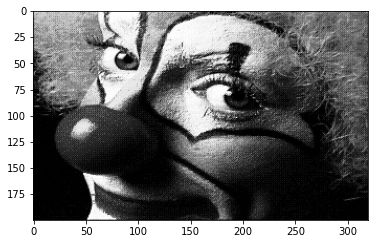

In [5]:
X = np.loadtxt("clownImage.txt")
plt.gray()
plt.imshow(X)

### Problem 2.2

In [6]:
u, s, v = np.linalg.svd(X, full_matrices = False)

Rank 5 Approximation


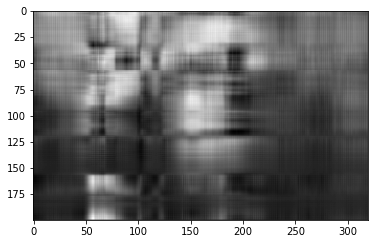

In [7]:
print("Rank 5 Approximation")
rank = 5
X_5 = np.matrix(u[:, :rank]) * np.diag(s[:rank]) * np.matrix(v[:rank, :])
plt.imshow(X_5)

Rank 15 Approximation


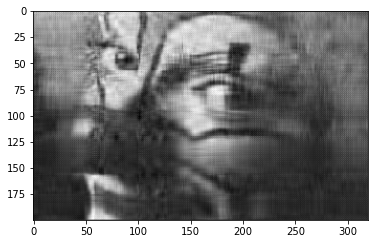

In [8]:
print("Rank 15 Approximation")
rank = 15
X_15 = np.matrix(u[:, :rank]) * np.diag(s[:rank]) * np.matrix(v[:rank, :])
plt.imshow(X_15)

Rank 25 Approximation


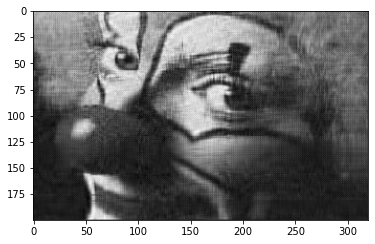

In [9]:
print("Rank 25 Approximation")
rank = 25
X_25 = np.matrix(u[:, :rank]) * np.diag(s[:rank]) * np.matrix(v[:rank, :])
plt.imshow(X_25)